# Rain in Austraila Classification

## 1. Introduction
As someone living in Ireland its easy to predict if it will rain tomorrow, the answer is always yes. <br>
However in Austraila its a much harder thing to predict, Due to lack of rainfall it is also much more important to know when its going to rain for eg in agriculture. <br>
This dataset contains about 10 years of daily weather observations from numerous Australian weather stations. <br>

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? <br>
This column is Yes if the rain for that day was 1mm or more.<br>
And thus we are going to become a more accurate weather forecaster!

## 2. Import and High Level Overview

In [21]:
import pandas as pd
import numpy as np
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [248]:
df = pd.read_csv("/Users/cameronlooney/Downloads/weatherAUS.csv")

In [226]:
df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [207]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,NaN,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,NaN,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,NaN,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,NaN,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,NaN,2008,12,5


In [5]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
def get_dtypes(data,drop_col=[]):
    """Return the dtypes for each column of a pandas Dataframe
    Parameters
    ----------
    data : pandas Dataframe
    drop_col : columns to omit in a list
    Returns
    -------
    str_var_list, num_var_list, all_var_list
    
    """

    name_of_col = list(data.columns)
    num_var_list = []
    str_var_list = []
    all_var_list = []

    str_var_list = name_of_col.copy()
    for var in name_of_col:
        # check if column belongs to numeric type
        if (data[var].dtypes in (np.int, np.int64, np.uint, np.int32, np.float,
                               np.float64, np.float32, np.double)):
            str_var_list.remove(var)
            num_var_list.append(var)
    # drop the omit column from list
    for var in drop_col:
        if var in str_var_list:
            str_var_list.remove(var)
        if var in num_var_list:
            num_var_list.remove(var)

    all_var_list.extend(str_var_list)
    all_var_list.extend(num_var_list)
    
    return str_var_list, num_var_list, all_var_list
string_vars, num_vars,all_vars = get_dtypes(df)

/var/folders/yt/tb5v0shj3l17fyn2bw5qqw3h0000gn/T/ipykernel_2592/3871755263.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (data[var].dtypes in (np.int, np.int64, np.uint, np.int32, np.float,
/var/folders/yt/tb5v0shj3l17fyn2bw5qqw3h0000gn/T/ipykernel_2592/3871755263.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumP

In [10]:
print("String Features: \n"+
     str(string_vars))

String Features: 
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [11]:
df[string_vars]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


- Date column is incorrectly labelled, its an object, we will convert it to datetime
- The remainder are all correct labelled

In [12]:
print("Numeric Features: \n"+
     str(num_vars))

Numeric Features: 
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [217]:
def missing_values(data):
    '''
    :param data: dataframe
    :return: dataframe with features, number of missing values and percentage of missing values,
    sort the dataframe by number of missing values
    '''
    missing_values = pd.DataFrame(data.isnull().sum()).reset_index()
    missing_values.columns = ['feature', 'missing_values']
    missing_values['percentage_missing_values'] = (missing_values['missing_values'] / len(data)) * 100
    missing_values = missing_values.sort_values('missing_values', ascending=False)
    return missing_values
print(missing_values(df))

          feature  missing_values  percentage_missing_values
6        Sunshine           67816                  47.692924
5     Evaporation           60843                  42.789026
18       Cloud3pm           57094                  40.152469
17       Cloud9am           53657                  37.735332
15    Pressure9am           14014                   9.855619
16    Pressure3pm           13981                   9.832411
9      WindDir9am           10013                   7.041838
7     WindGustDir            9330                   6.561504
8   WindGustSpeed            9270                   6.519308
10     WindDir3pm            3778                   2.656952
14    Humidity3pm            3610                   2.538803
20        Temp3pm            2726                   1.917113
12   WindSpeed3pm            2630                   1.849599
13    Humidity9am            1774                   1.247600
4        Rainfall            1406                   0.988797
21      RainToday       

- Majority of the columns have missing data that will need to be inputed and cleaned up, some columns have a large percentage of missing values so we might have to drop these. Further exploration might suggest an inputation strategy that allows us to keep the features <br>
- Some of the target variables are not labelled, we will drop these rows as we are performing supervised learning 

In [16]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [20]:
df.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


## 3.0 Exploratory Data Analysis

### Target Variable Analysis

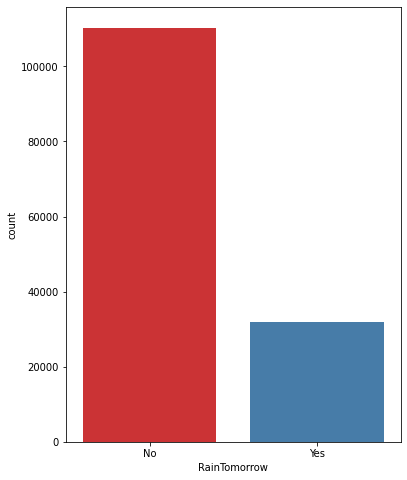

In [22]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

We see that the problem is an imbalanced binary classification problem, we must be careful with splitting our data, We must insure to stratify the target variable to make sure we get equal porportions of the classes in both the training and the test data. 

Stratified sampling is important here as it allows us to obtain a sample population that will best represent the entire population and thus will generalise better

In [249]:
# drop nan rows where the target variable is unknown
df = df.dropna(subset=['RainTomorrow'])


### Univariate Analysis

In [34]:
# custom function for easy and efficient analysis of numerical univariate
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
def UVA_numeric(data, var_group):
    size = len(var_group)
    plt.figure(figsize = (7*size,3), dpi = 100)
  
    #looping for each variable
    for j,i in enumerate(var_group):

    # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # calculating points of standard deviation
        points = mean-st_dev, mean+st_dev

        #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i], shade=True)
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
        sns.scatterplot([mean], [0], color = 'red', label = "mean")
        sns.scatterplot([median], [0], color = 'blue', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                       round(kurt,2),
                                                                                                       round(skew,2),
                                                                                                       (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                       round(mean,2),
                                                                                                       round(median,2)))

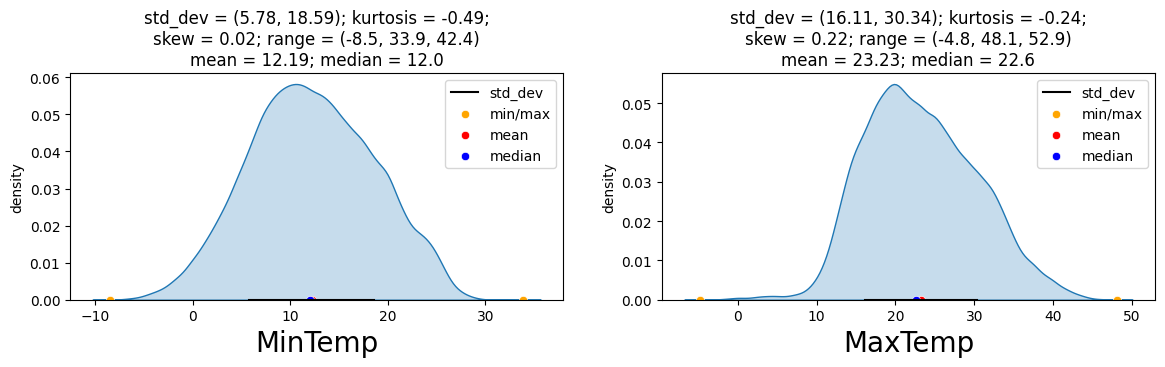

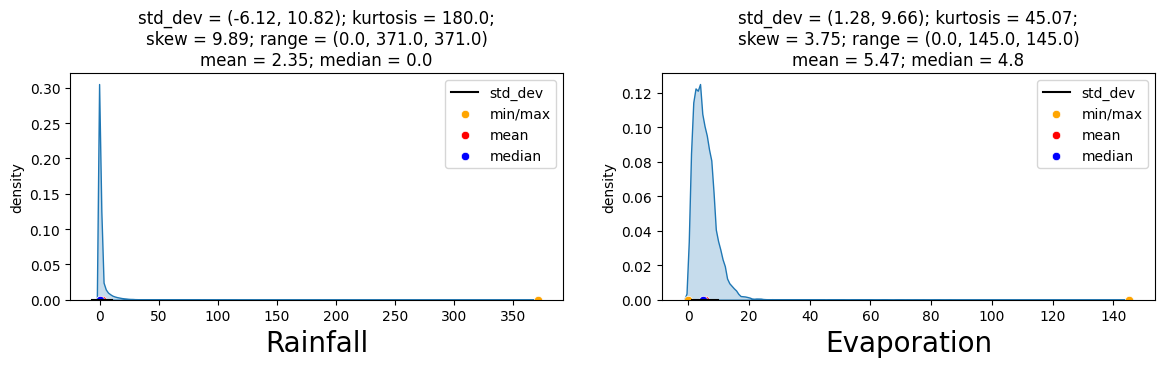

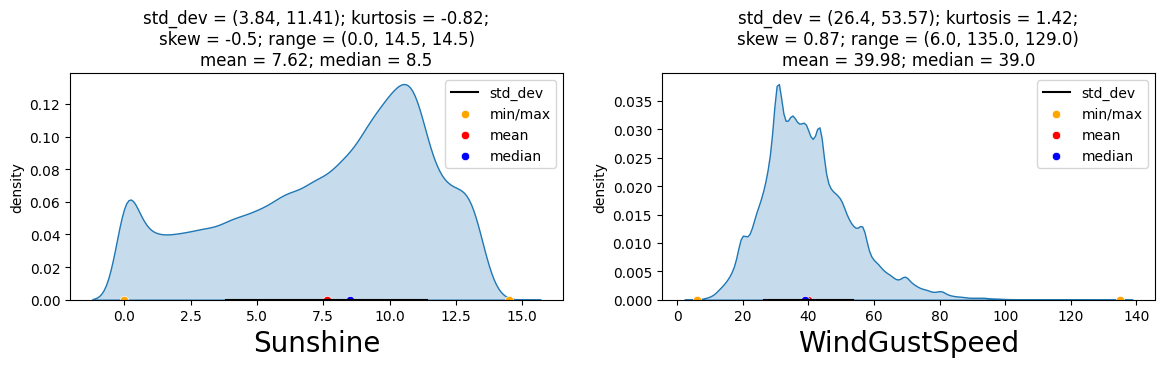

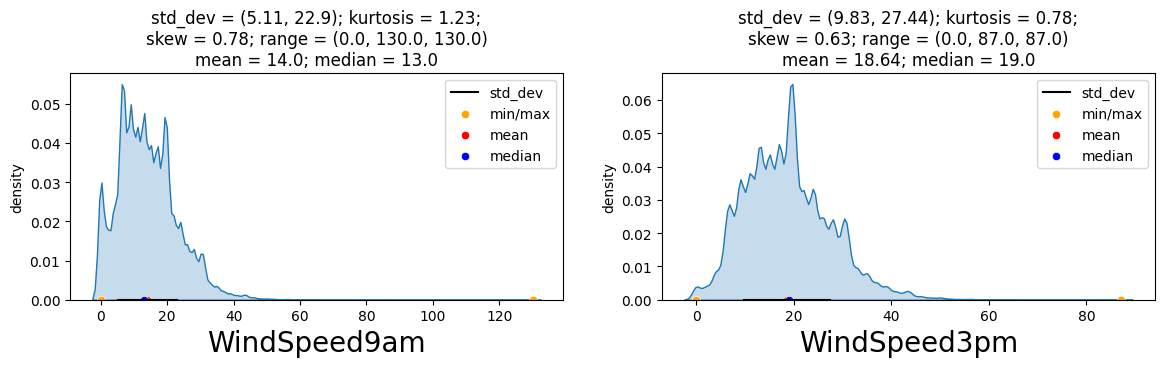

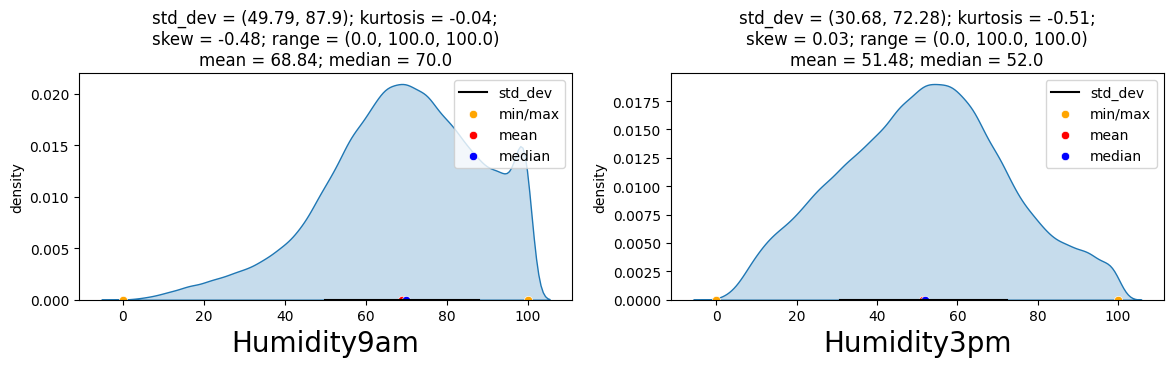

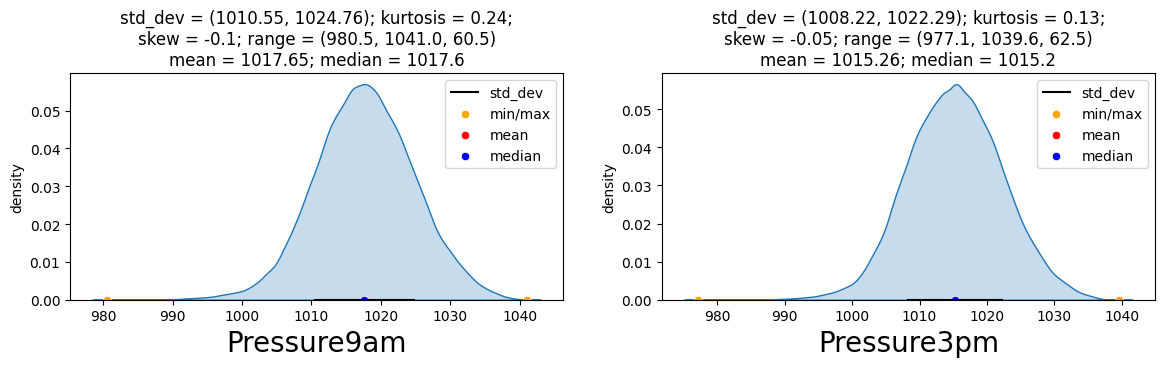

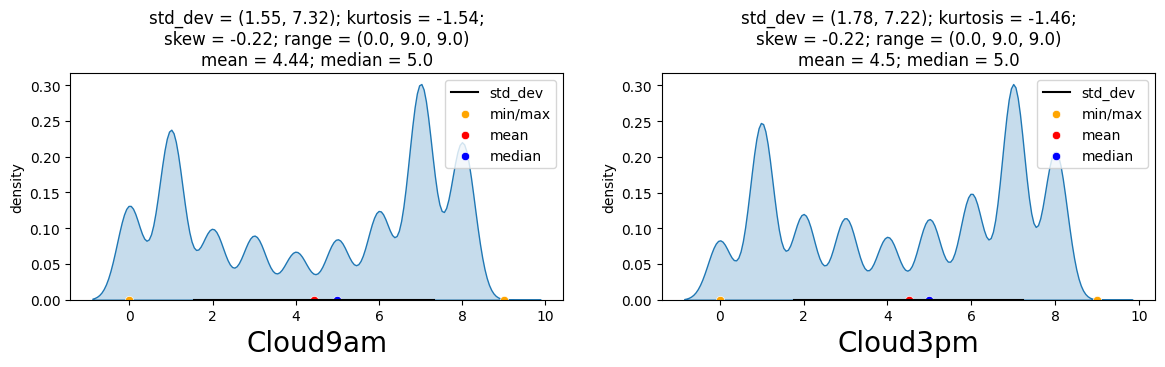

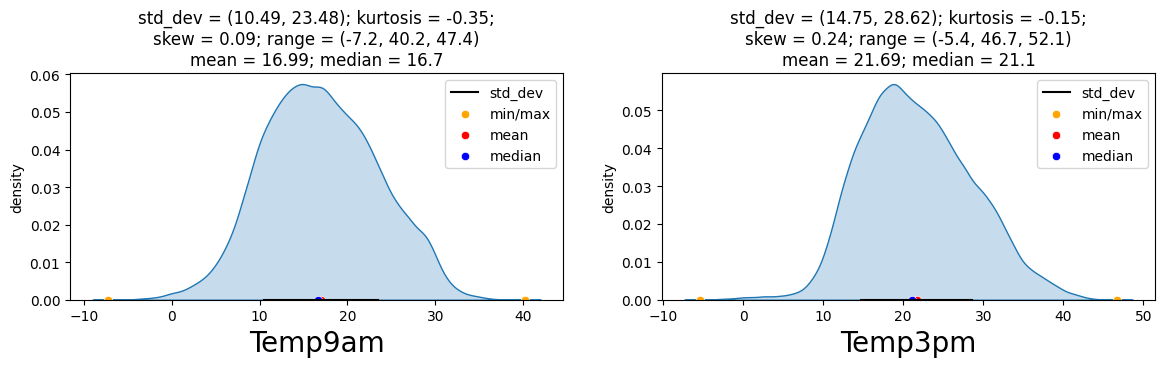

In [37]:
def UVA_numeric_print(df,num_vars):
    size = len(num_vars)
    for i in range(0,size,2):
        k = num_vars[i:i+2]
        UVA_numeric(df,k)
UVA_numeric_print(df,num_vars)

- Min and Max Temp are both reasonably normally distributed (slight chance of outliers)
- Both Rainfall and Evaporation and extreme outliers which is leading to an extreme right tail
- Wind gust speed appears to be log disbributed, while sunshine has a quantity of 0 values that are skewing the distribution
- Windspeed is not normally disributed and has outliers
- Huimidy has 0 values that are causing skews
- Clouds appear to be on a 0-10 scale
- Temp is normally distributed

In [38]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):
    size = len(var_group)
    plt.figure(figsize = (7*size,5), dpi = 100)

    # for every variable
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()

        #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.barplot(norm_count, norm_count.index , order = norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel('{}'.format(i), fontsize = 20)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
        

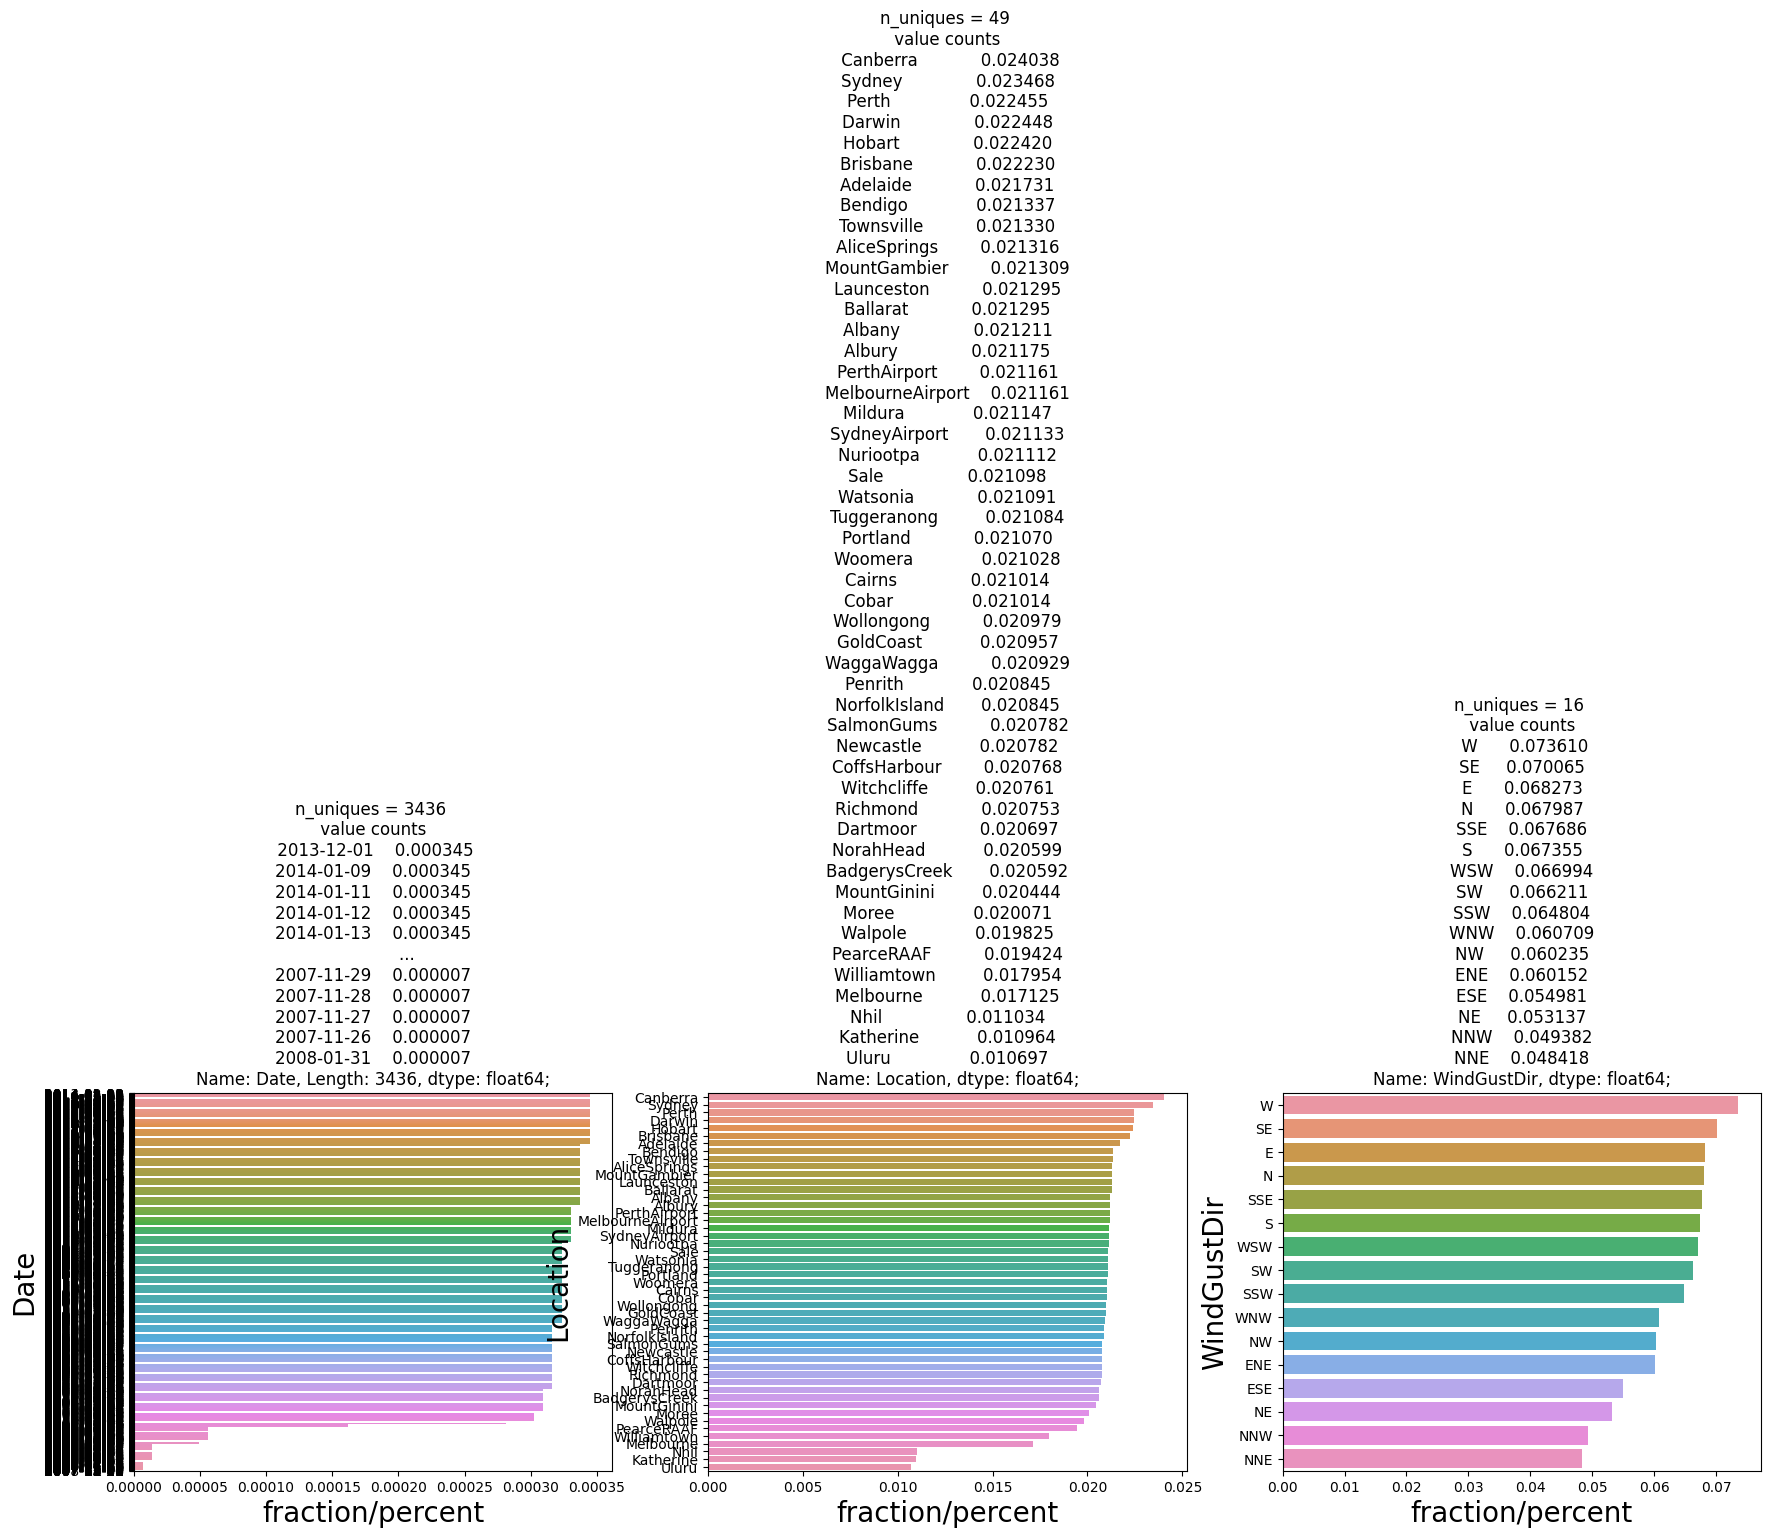

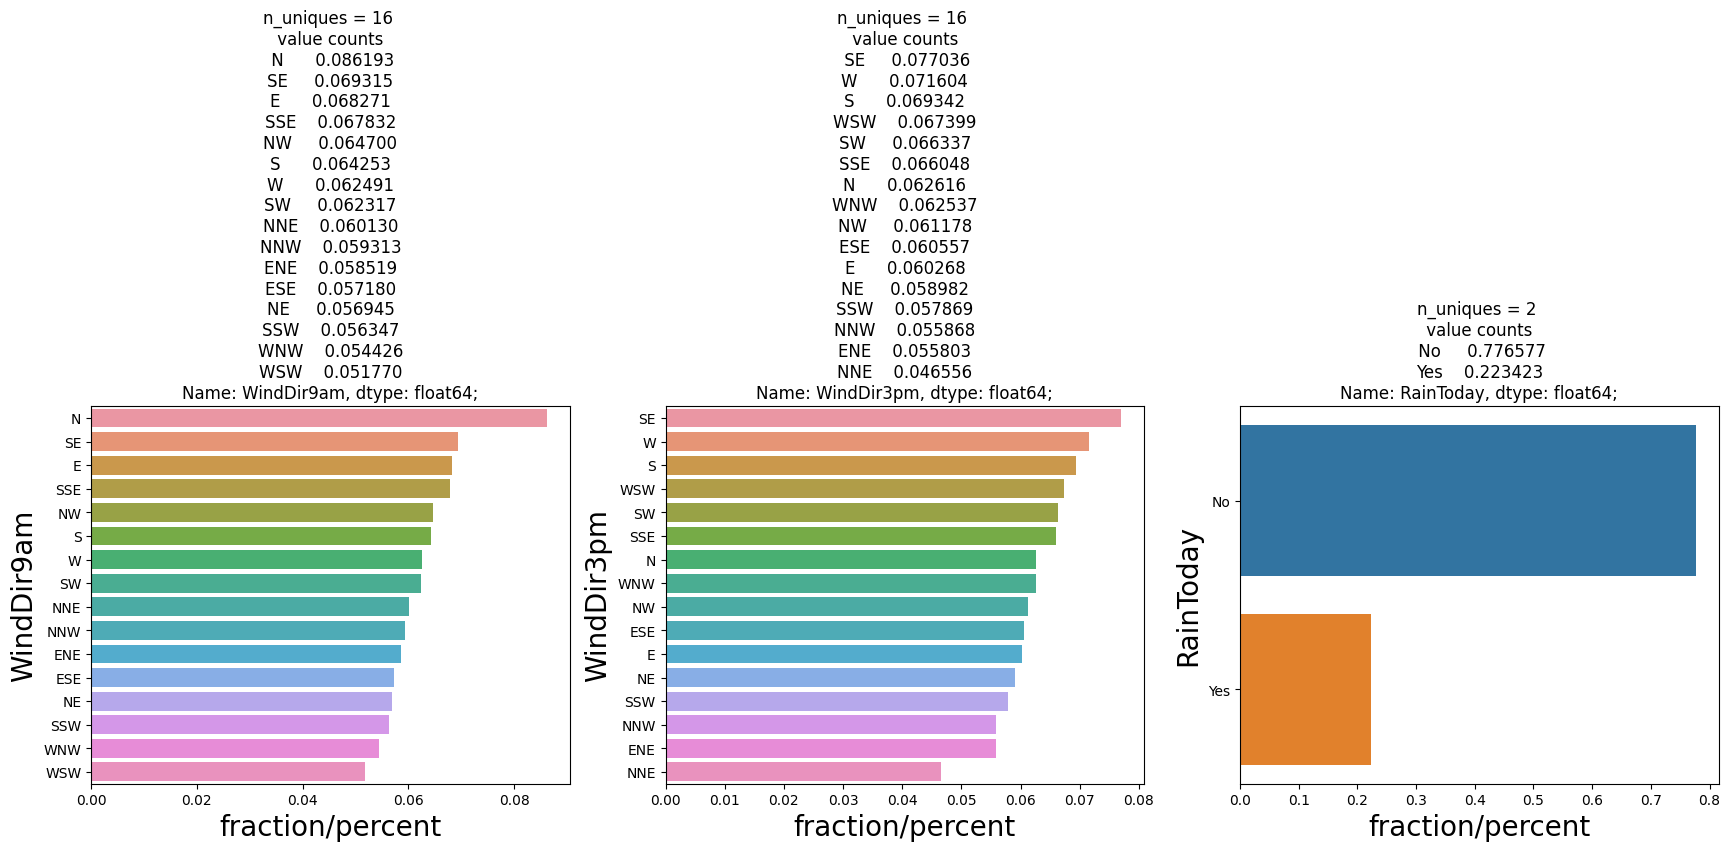

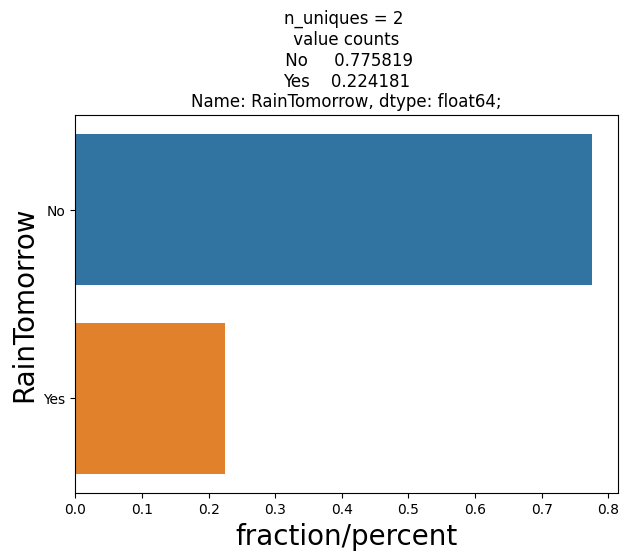

In [41]:
def UVA_category_print(df,string_vars):
    size = len(string_vars)
    for i in range(0,size,3):
        k = string_vars[i:i+3]
        UVA_category(df,k)
UVA_category_print(df,string_vars)

### Bivariate Analysis

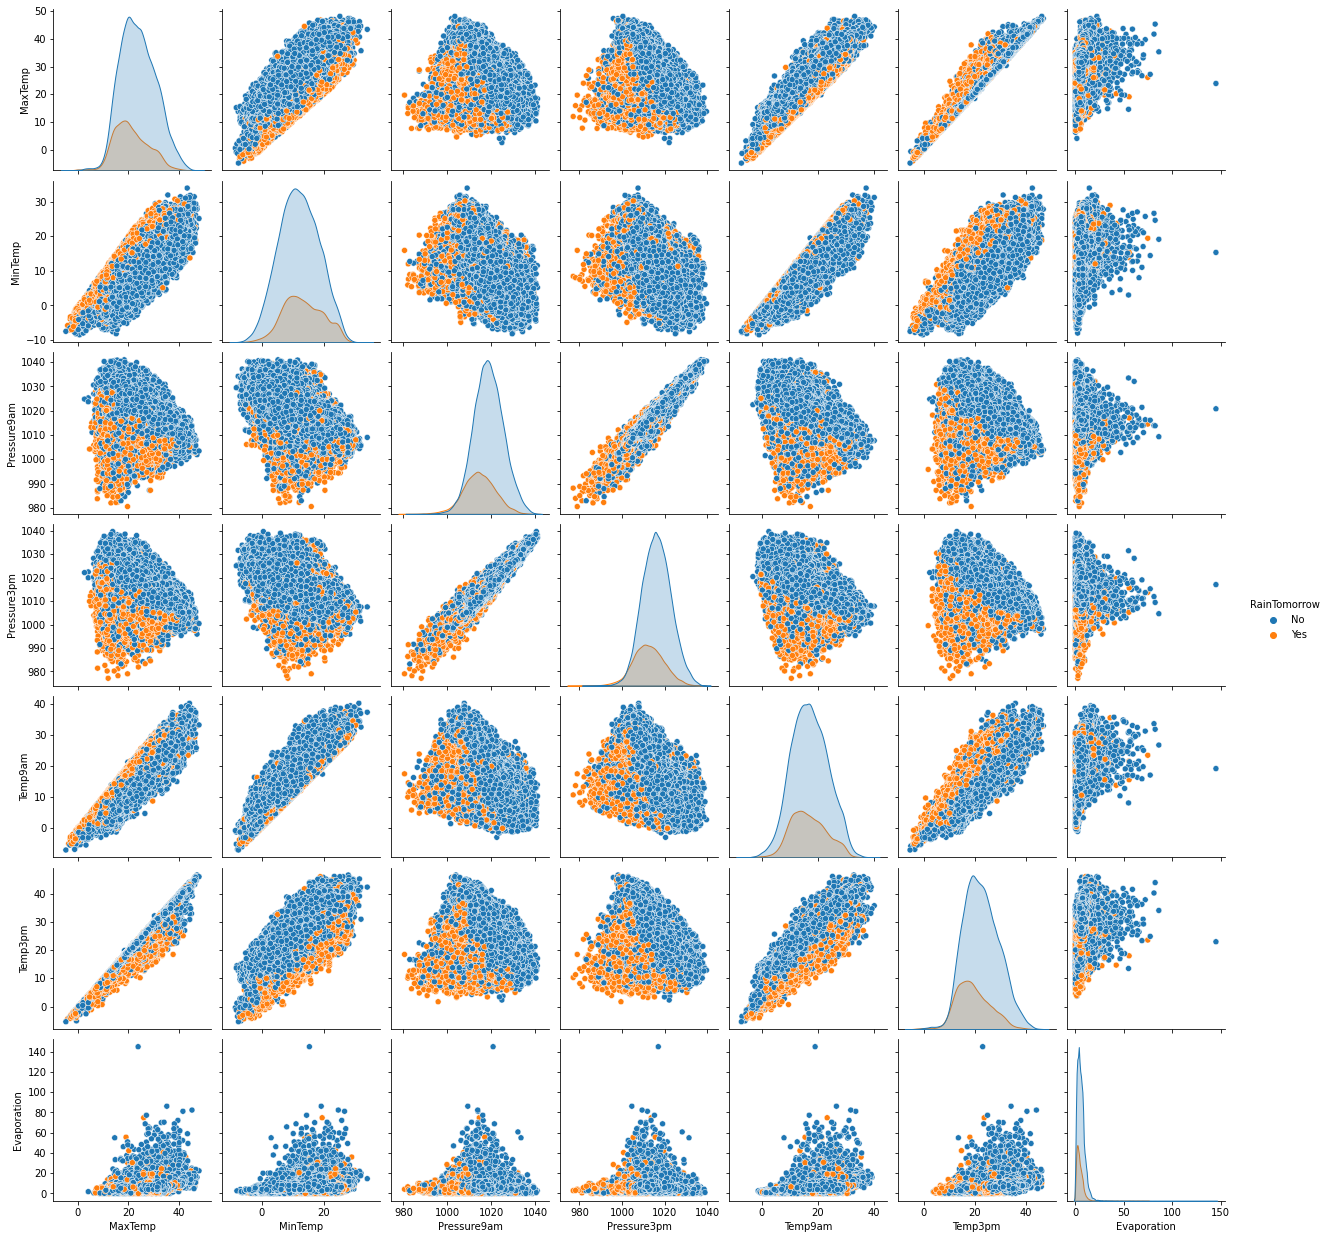

In [40]:
sns.pairplot( data=df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )

We see that we have several points that are highly correlated

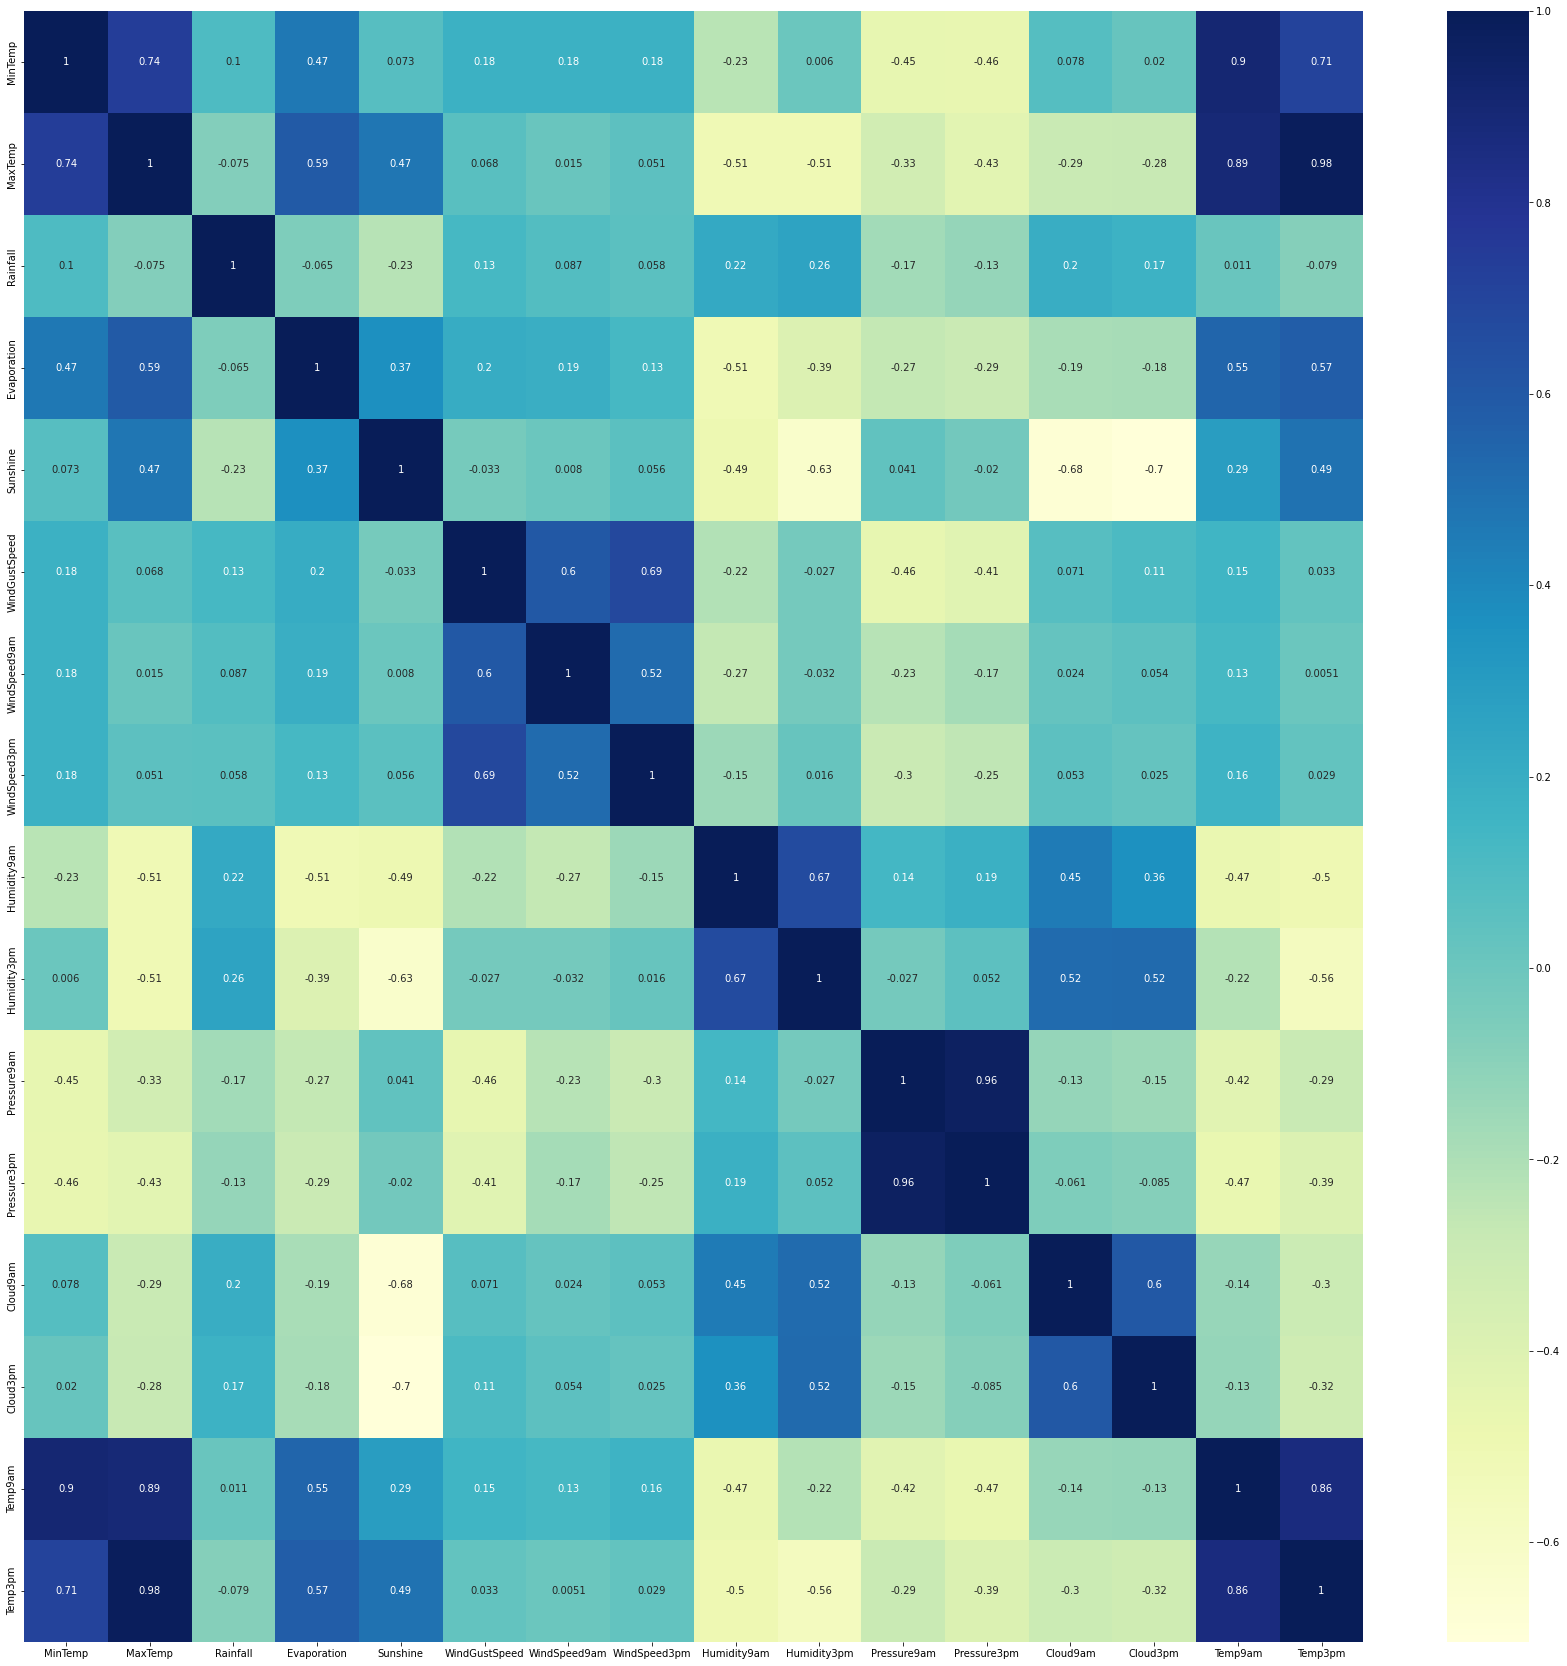

In [42]:
def correlation_matrix(data,width,height):
    '''
    :param data: dataframe
    :return: correlation matrix with heatmap
    '''
    plt.figure(figsize=(width, height))
    sns.heatmap(data.corr(), cmap="YlGnBu",annot=True)

correlation_matrix(df,30,30)

- Min Temp and Max Temp, Temp3pm and Temp 9am have a strong positive linear relationship <br>
- Cloud and Sunshine have a strong negative relationship <br>
- There is alot of correlated features, we should perform feature reduction or drop some features

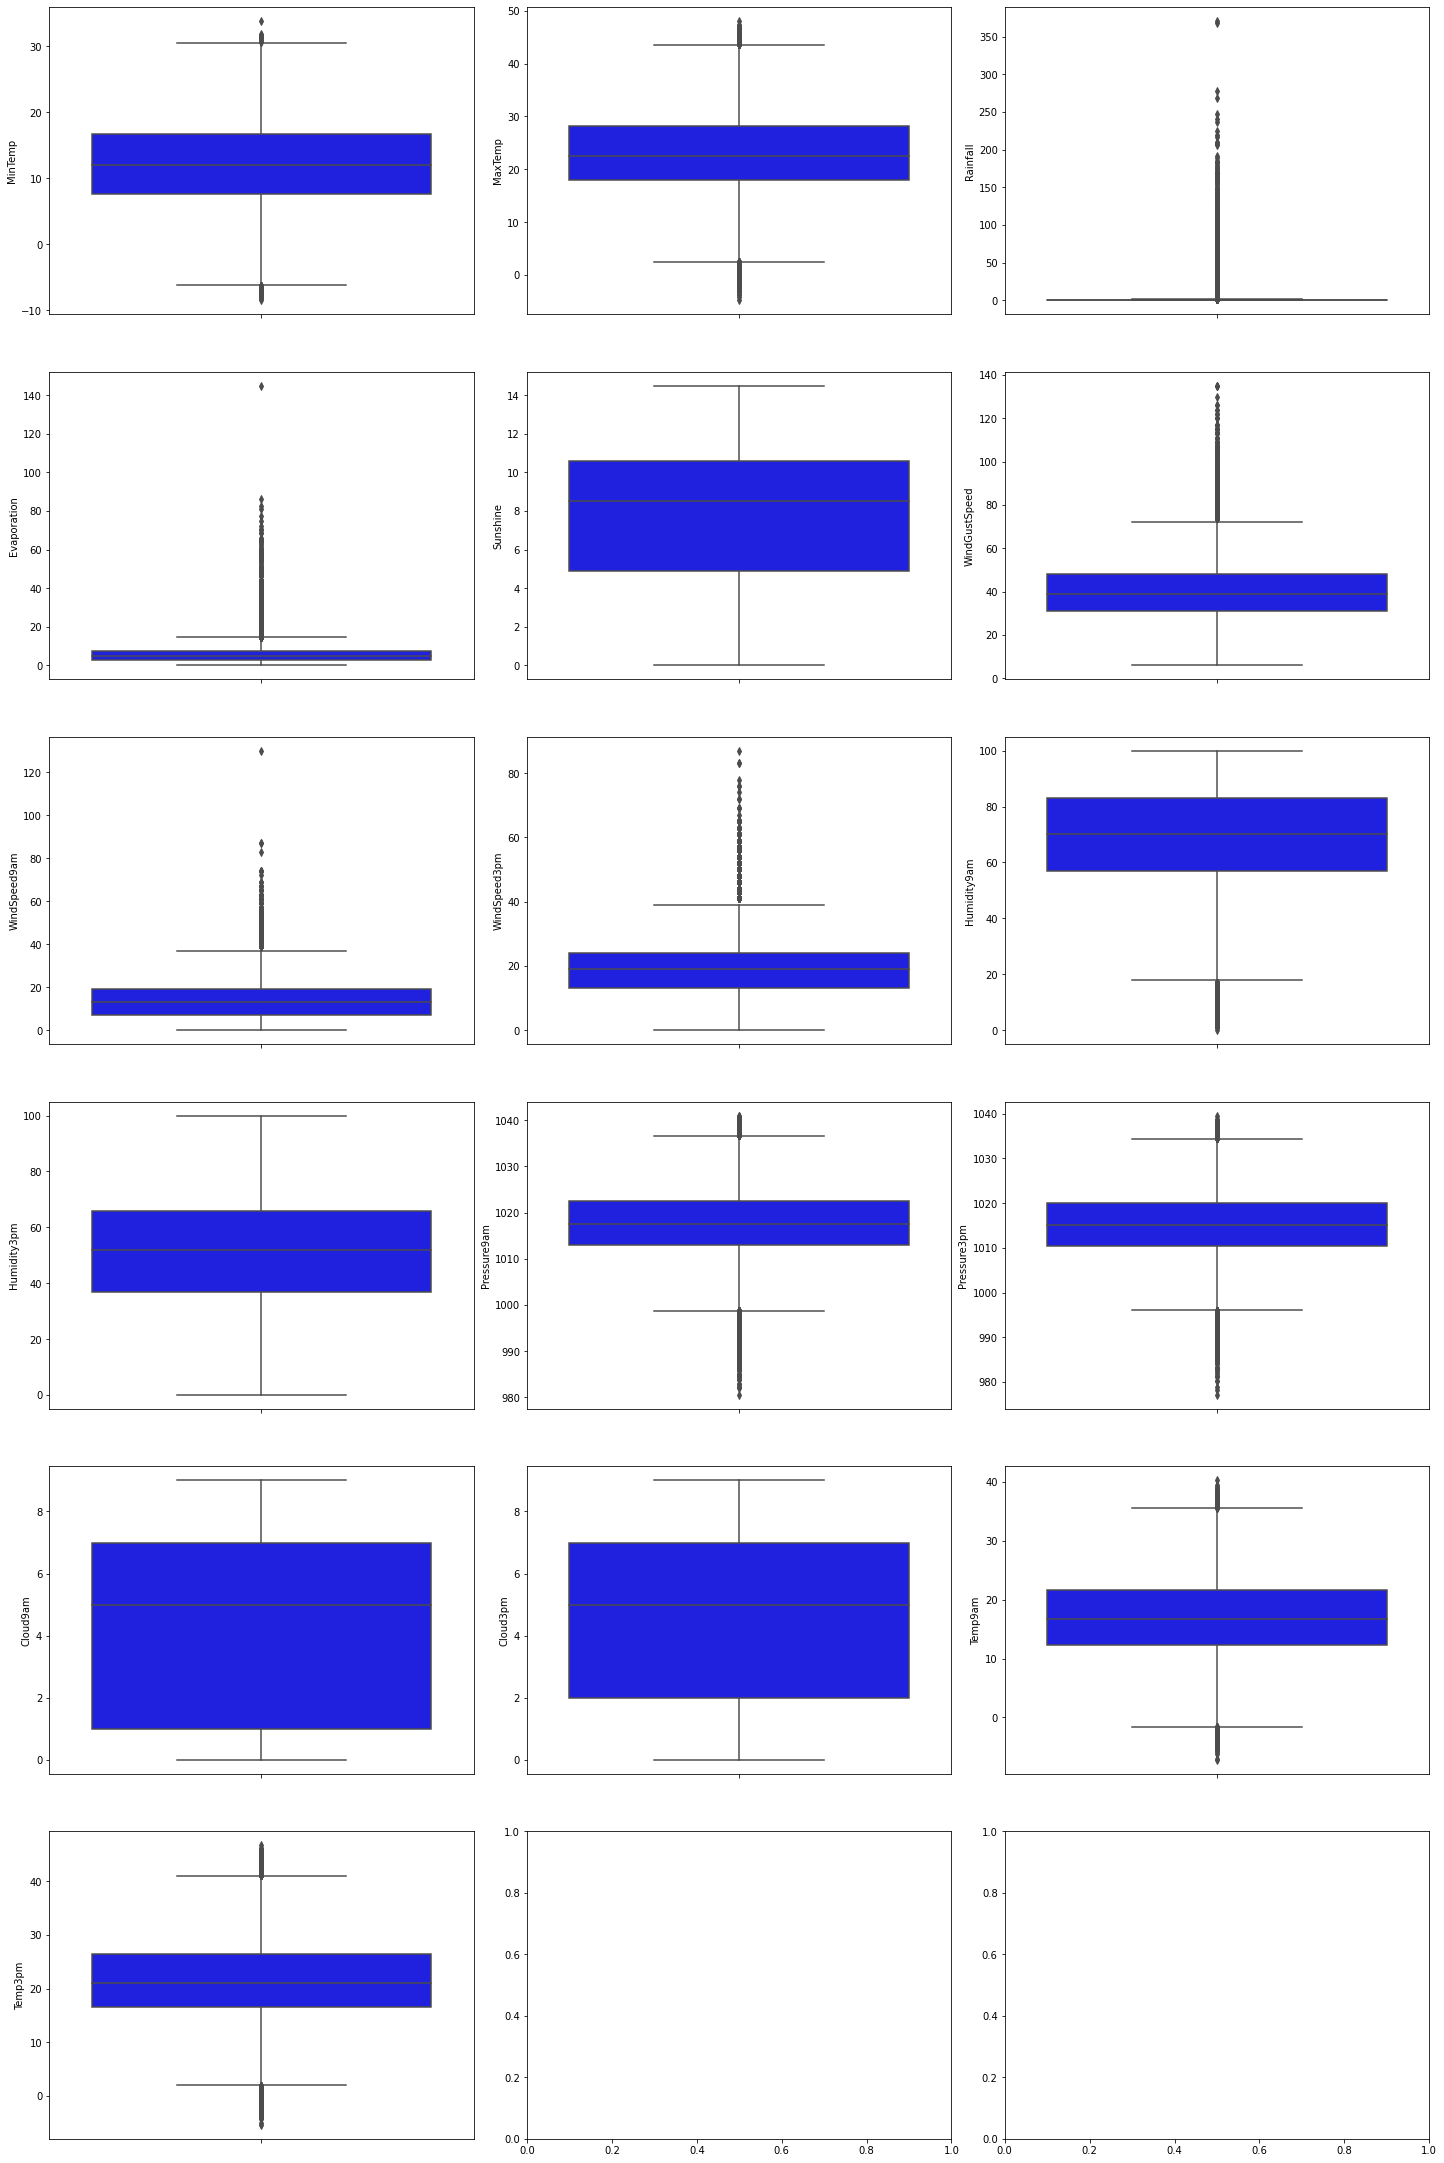

In [45]:
def box_whisker(df,cols,rows,width,height):
    fig, ax = plt.subplots(ncols=cols, nrows=rows, figsize=(width,height))
    index = 0
    ax = ax.flatten()

    for col, value in df.items():
        sns.boxplot(y=col, data=df, color='b', ax=ax[index])
        index += 1
    plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
box_whisker(df[num_vars],3,6,20,30)

We see we have a large amount of outliers for the majority of our variables, this will inform our inputation strategy as mean is effected by outliers while median is more robust, thus we will use median as our strategy for missing values

## Feature Engineering
- Parse date to correct data type
- Extract Day Month and Year
- Inpute missing values
- drop rows with too many missing variables


In [97]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [250]:
def date_parse(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    # extract month from date
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df.drop('Date', axis=1, inplace = True)
    return df
df = date_parse(df)

## Split Data

In [251]:
from sklearn.model_selection import train_test_split
df['RainTomorrow'] = df['RainTomorrow'].map({"Yes": 1, "No": 0})
y = df['RainTomorrow']
X = df.drop('RainTomorrow',errors='ignore',axis=1)
df.columns


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, shuffle= True,stratify = y)
# By using a stratified split, the raito of 1 and 0s are consistent btwn the two splits 
print(y_train.value_counts())
print(y_test.value_counts())

0    88252
1    25502
Name: RainTomorrow, dtype: int64
0    22064
1     6375
Name: RainTomorrow, dtype: int64


### Missing Values

In [253]:
categorical = [var for var in X.columns if df[var].dtype=='O']
numerical = num_vars

In [254]:

from sklearn.impute import SimpleImputer


def impute_missing(df,numerical, categorical):
    numeric_strat = SimpleImputer(missing_values=np.nan, strategy='median')
    df[numerical] = numeric_strat.fit_transform(df[numerical])
    return df


In [255]:
X_train= impute_missing(X_train, numerical ,categorical)

/var/folders/yt/tb5v0shj3l17fyn2bw5qqw3h0000gn/T/ipykernel_2592/2604162433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical] = numeric_strat.fit_transform(df[numerical])


In [256]:

def dummy_variables(df,categorical):
    df= pd.get_dummies(df, dummy_na=True)
    return df
X_train = dummy_variables(X_train,categorical)
    

In [257]:
from sklearn.preprocessing import MinMaxScaler
def scale_features(df):
    cols = df.columns
    scaler = MinMaxScaler()
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns=[cols])
    return df
X_train = scale_features(X_train)
    

In [258]:
X_test = impute_missing(X_test, numerical ,categorical)

/var/folders/yt/tb5v0shj3l17fyn2bw5qqw3h0000gn/T/ipykernel_2592/2604162433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical] = numeric_strat.fit_transform(df[numerical])


In [259]:
X_test = dummy_variables(X_test,categorical)

In [260]:
X_test = scale_features(X_test)

In [261]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)

y_pred_test
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8416


In [ ]:
from sklearn.model_selection import GridSearchCV

In [262]:
y_test.value_counts()
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


### Interpretation
We can see that our model accuracy score is 0.8416 but null accuracy score is 0.7759. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

### Interpretation
Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.



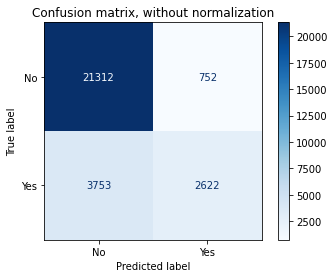

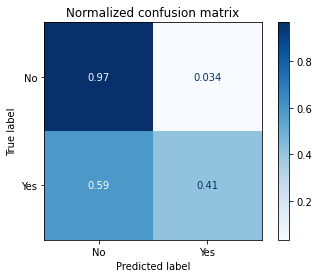

In [161]:
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score,plot_confusion_matrix
def c_matrix(df):
    # Plot Both Confusion Matrix, without normalization and with normalization 
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(df, X_test, y_test,
                                     display_labels=df.classes_,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

    plt.show()
c_matrix(logreg)

The confusion matrix shows 21312 + 2622 = 23,934 correct predictions and 3753 + 752 = 4505 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 21312 <br>
True Negatives (Actual Negative:0 and Predict Negative:0) - 2622 <br>
False Positives (Actual Negative:0 but Predict Positive:1) - 752 (Type I error)<br>
False Negatives (Actual Positive:1 but Predict Negative:0) - 3753 (Type II error)<br>

**Classification Report**

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [163]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.85      0.97      0.90     22064
         Yes       0.78      0.41      0.54      6375

    accuracy                           0.84     28439
   macro avg       0.81      0.69      0.72     28439
weighted avg       0.83      0.84      0.82     28439



## Definitions
### Recall <br>
Recall is another important metric, which is defined as the fraction of samples from a class which are correctly predicted by the model.<br>
More formally:<br>

**Recall= True Positive/ (True Positive+ False Negative)**

### Classification accuracy 
CA is perhaps the simplest metrics one can imagine, and is defined as the number of correct predictions divided by the total number of predictions, multiplied by 100. So in the above example, out of 1100 samples 1030 are predicted correctly, resulting in a classification accuracy of:

Classification accuracy= (90+940)/(1000+100)= 1030/1100= 93.6%. <br>
However this can be misleading. If we want to predict a disease that 1 percent of the population has and we predict no one has the disease, our accuracy will be good but our model is useless

### Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

### f1-score 

f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

--------------- CONFUSION MATRIX ---------------




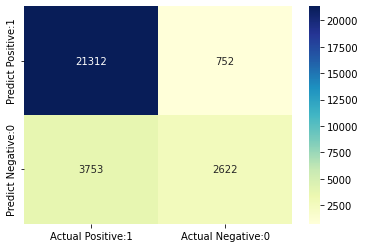


True Positives(TP) =  21312

True Negatives(TN) =  2622

False Positives(FP) (Type I Error) =  752

False Negatives(FN) (Type II Error) =  3753


--------------- CLASSIFICATION REPORT ---------------


              precision    recall  f1-score   support

          No       0.85      0.97      0.90     22064
         Yes       0.78      0.41      0.54      6375

    accuracy                           0.84     28439
   macro avg       0.81      0.69      0.72     28439
weighted avg       0.83      0.84      0.82     28439



--------------- PERFORMANCE METRICS ---------------


Classification accuracy : 0.8416
Classification error : 0.1584
Precision : 0.9659
Recall or Sensitivity : 0.8503
False Positive Rate : 0.2229
Specificity : 0.7771


In [181]:
def classification_custom_report(model,y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred_test)
    
    print('--------------- CONFUSION MATRIX ---------------')
    print('\n')
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.show()

    print('\nTrue Positives(TP) = ', cm[0,0])

    print('\nTrue Negatives(TN) = ', cm[1,1])

    print('\nFalse Positives(FP) (Type I Error) = ', cm[0,1])

    print('\nFalse Negatives(FN) (Type II Error) = ', cm[1,0])

    print('\n')
    print('--------------- CLASSIFICATION REPORT ---------------')
    print('\n')
    
    print(classification_report(y_test, y_pred))
    
    print('\n')
    print('--------------- PERFORMANCE METRICS ---------------')
    print('\n')
    
    TP = cm[0,0]
    TN = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    
    classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
    print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
    
    # print classification error

    classification_error = (FP + FN) / float(TP + TN + FP + FN)

    print('Classification error : {0:0.4f}'.format(classification_error))
    
    # print precision score

    precision = TP / float(TP + FP)


    print('Precision : {0:0.4f}'.format(precision))
    
    recall = TP / float(TP + FN)

    print('Recall or Sensitivity : {0:0.4f}'.format(recall))
    
    false_positive_rate = FP / float(FP + TN)
    print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
    specificity = TN / (TN + FP)
    print('Specificity : {0:0.4f}'.format(specificity))

classification_custom_report(logreg,y_test, y_pred_test)

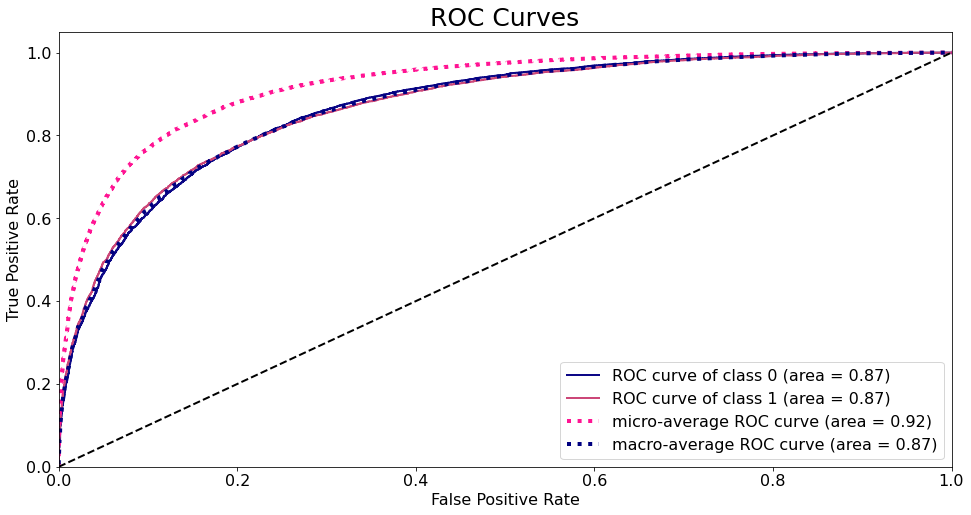

Overall AUC: 0.689


In [263]:
import scikitplot as skplt
y_pred_test = np.where(y_pred_test == "Yes", 1, 0)
def ROC_curve(model,X_test, y_test):
    y_true = y_test # ground truth label
    y_probas = model.predict_proba(X_test) # predicted probabilities generated by sklearn classifier

    skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize=25, text_fontsize=16, cmap='plasma')
    plt.grid(False)
    plt.show()
    score = roc_auc_score(y_test,model.predict(X_test))
    print("Overall AUC: {:.3f}" .format(score))
ROC_curve(logreg,X_test,y_test)